In [2]:
import matplotlib
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm
%matplotlib inline  

import numpy as np
from tools import *

# Partie 1 : SIFT

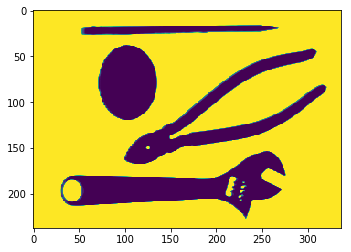

In [3]:
# example images
I = read_grayscale('data/tools.tiff')
I2 = read_grayscale('data/Scene/CALsuburb/image_0205.jpg')
plt.imshow(I)

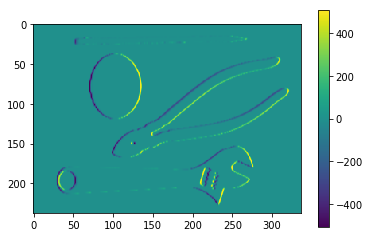

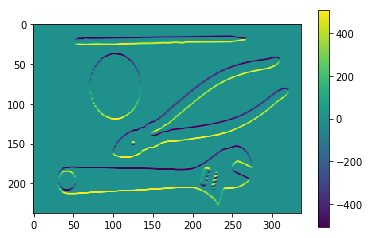

In [4]:
def compute_grad(I):
    """
    """
    ha = np.array([1/2, 1, 1/2])
    hb = np.array([-1, 0, 1])
    Ix = conv_separable(I, hb, ha)
    Iy = conv_separable(I, ha, hb)
    
    return Ix, Iy

# example d'affichage du résultat
Ix, Iy = compute_grad(I)
plt.imshow(Ix)
plt.colorbar()
plt.show()
plt.imshow(Iy)
plt.colorbar()
plt.show()

In [5]:
def compute_grad_mod_ori(I):
    """
    """
    Ix, Iy = compute_grad(I)
    Gm = np.sqrt((Ix**2 + Iy**2))
    Go = compute_grad_ori(Ix, Iy, Gm)
    return Gm, Go

In [6]:
def compute_sift_region(Gm, Go, mask=None):
    """ Return an array of 128 values 
    """
    # TODO
    # Note: to apply the mask only when given, do:
    sift_size = 128
    patch_size = 16
    sr_size = 4
    Gm_pond = Gm
    if mask is not None:
        Gm_pond = Gm * mask
   
    P_enc  = []    
    for i in range(0, patch_size, sr_size):
        for j in range(0, patch_size, sr_size):
            for k in range(8):
                srm = Gm[i:i+sr_size, j:j+sr_size]
                sro = Go[i:i+sr_size, j:j+sr_size]
                ind_k = np.where(sro == k)
                P_enc.append(srm[ind_k].sum())
 
    # Post processing
    if np.linalg.norm(P_enc) < 0.5:
        return np.zeros(sift_size)
    else:
        P_enc /= np.linalg.norm(P_enc)
        # Indices where value is superior to zeros.deux
        P_enc = np.where(P_enc > 0.2, 0.2, P_enc)
        P_enc /= np.linalg.norm(P_enc)
        
        
    return P_enc


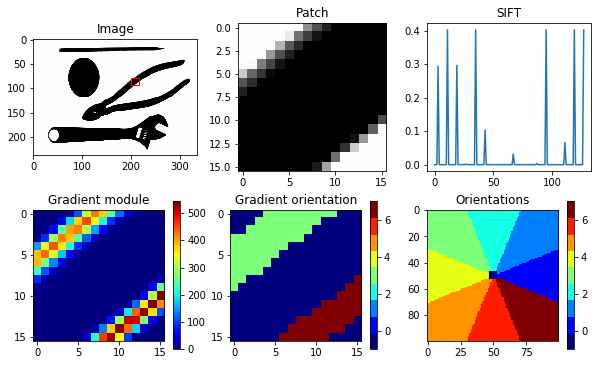

array([0.        , 0.        , 0.        , 0.29382397, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.4024072 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.29644272,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00192064, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.4024072 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.10378698, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03151167, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

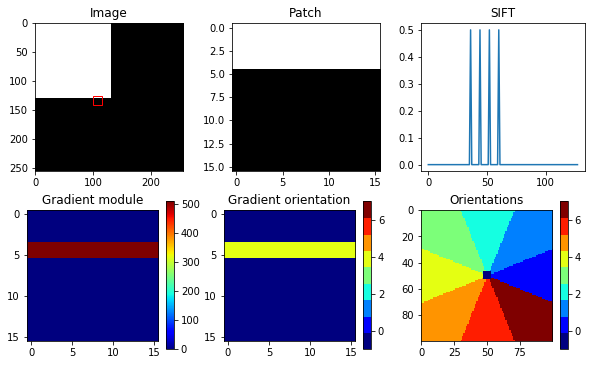

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ])

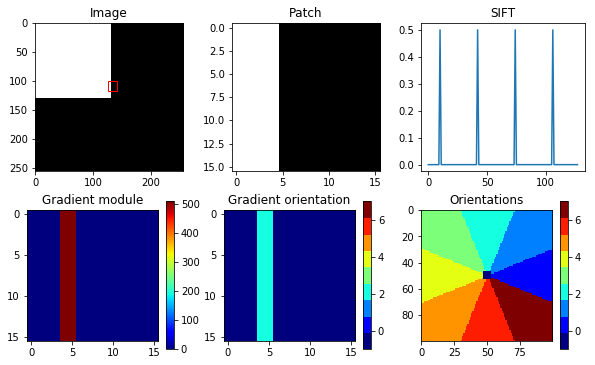

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ])

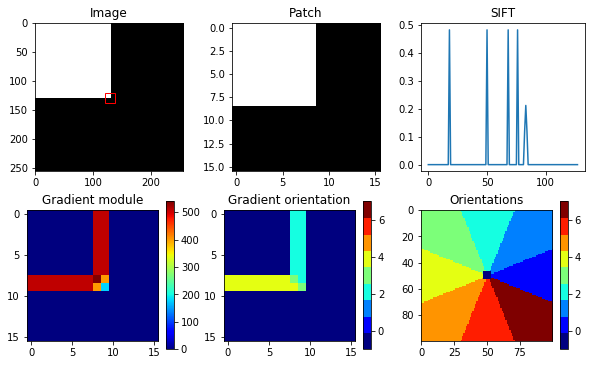

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.48149295, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.48149295, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.48149295, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

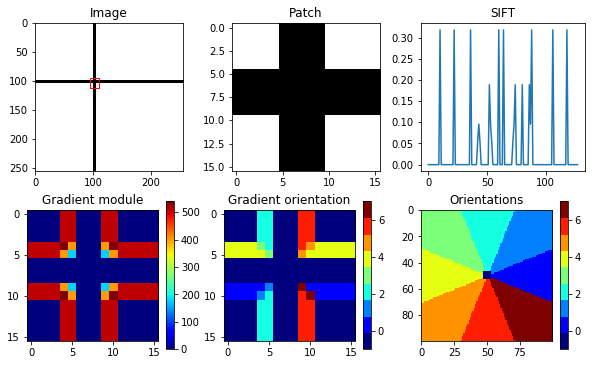

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.3181317 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.3181317 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.3181317 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05344409, 0.09560369, 0.05344409,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.18864812, 0.09560369, 0.05344409,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.3181317 , 0.        , 0.        , 0.        , 0.3181317 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05344409, 0.09560369, 0.18864

In [7]:
# Example of viz of SIFTs
# set gausm to True to apply mask weighting of gradients
display_sift_region(I, compute_grad_mod_ori, compute_sift_region, x=200, y=78, gausm=False)
display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=100, y=125, gausm=False)
display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=125, y=100, gausm=False)
display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=121, y=121, gausm=False)
display_sift_region(toy_im(),    compute_grad_mod_ori, compute_sift_region, x=95, y=95, gausm=False)

In [8]:
def compute_sift_image(I):
    """
    """
    x, y = dense_sampling(I)
    im = auto_padding(I)
    k, sift_size = 16, 128
    g_m, g_o = compute_grad_mod_ori(im)
    
    # calculs communs aux patchs
    sifts = np.zeros((len(x), len(y), sift_size))
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            g_m_r = g_m[xi:xi+k, yj:yj+k]
            g_o_r = g_o[xi:xi+k, yj:yj+k]
            sift = compute_sift_region(g_m_r, g_o_r)
            # SIFT du patch de coordonnee (xi, yj)
            sifts[i, j, :] = sift
            print(sifts[i, j, :])
            
    return sifts

# Partie 2 : Dictionnaire visuel

In [9]:
# Ideally, restart the Python kernel to start from a clean slate
import os
import numpy as np
from tools import *
from sift import *

from sklearn.cluster import KMeans

In [10]:
# Paths config
dir_sc = os.path.join('data', 'Scene')
dir_sift = os.path.join('data', 'sift')
path_vdict = os.path.join('data', 'kmeans', 'vdict.npy')
path_vdsift = os.path.join('data', 'kmeans', 'vdsift.npy')
path_vdinames = os.path.join('data', 'kmeans', 'vdinames.npy')

inames, ilabls, cnames = load_dataset(dir_sc)

In [11]:
# If you want to look at the SIFTs that will be fed to compute_visual_dict:
sifts_list_by_image = compute_load_sift_dataset(dir_sc, dir_sift, inames, compute_sift_image)

Computing or loading SIFTs


In [12]:
# Code here the `compute_visual_dict` function
def compute_visual_dict(sift, n_clusters=1000, n_init=1, verbose=1):
    """
    :param sift: sifts_list_by_image
    """
    
    sift_size = 128
    # reorder data
    dim_sift = sift[0].shape[-1]
 
    sift = [s.reshape(-1, dim_sift) for s in sift]
    sift = np.concatenate(sift, axis=0)
    # remove zero vectors
    keep = ~np.all(sift==0, axis=1)
    sift = sift[keep]
    # randomly pick sift
    ids, _ = compute_split(sift.shape[0], pc=0.05)
    sift = sift[ids]
    
    # compute kmeans on `sift`, get cluster centers, add zeros vector
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, verbose=verbose)
    kmeans.fit(sift)
    clusters = kmeans.cluster_centers_
    
    return np.vstack((clusters, np.zeros(sift_size).reshape(1, -1)))

In [ ]:
# Run the visual dict computation (saved the first time)
vidct = compute_or_load_vdict(dir_sc, dir_sift, inames, compute_sift_image, path_vdict, compute_visual_dict)

Computing or loading visual dict
Computing or loading SIFTs
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 184451256312.6346
start iteration
done sorting
end inner loop
Iteration 1, inertia 179939396888.9666
start iteration
done sorting
end inner loop
Iteration 2, inertia 178627228382.33664
start iteration
done sorting
end inner loop
Iteration 3, inertia 177983708994.06635
start iteration
done sorting
end inner loop
Iteration 4, inertia 177600217276.79364
start iteration
done sorting
end inner loop
Iteration 5, inertia 177349456462.47253
start iteration
done sorting
end inner loop
Iteration 6, inertia 177172624836.1891
start iteration
done sorting
end inner loop
Iteration 7, inertia 177043023363.0225
start iteration
done sorting
end inner loop
Iteration 8, inertia 176940668528.2139
start iteration
done sorting
end inner loop
Iteration 9, inertia 176857178616.87473
start iteration
done sorting
end inner loop
Iteration 10, inertia 176788330375.20

In [8]:
# Study of the dict
regions, sifts = get_regions_and_sifts(dir_sc, np.random.choice(inames, 30)) # Compute SIFT and regions from 30 random images
display_images(regions[np.random.choice(len(regions), 100)]) # Show 100 random regions

ValueError: a must be non-empty

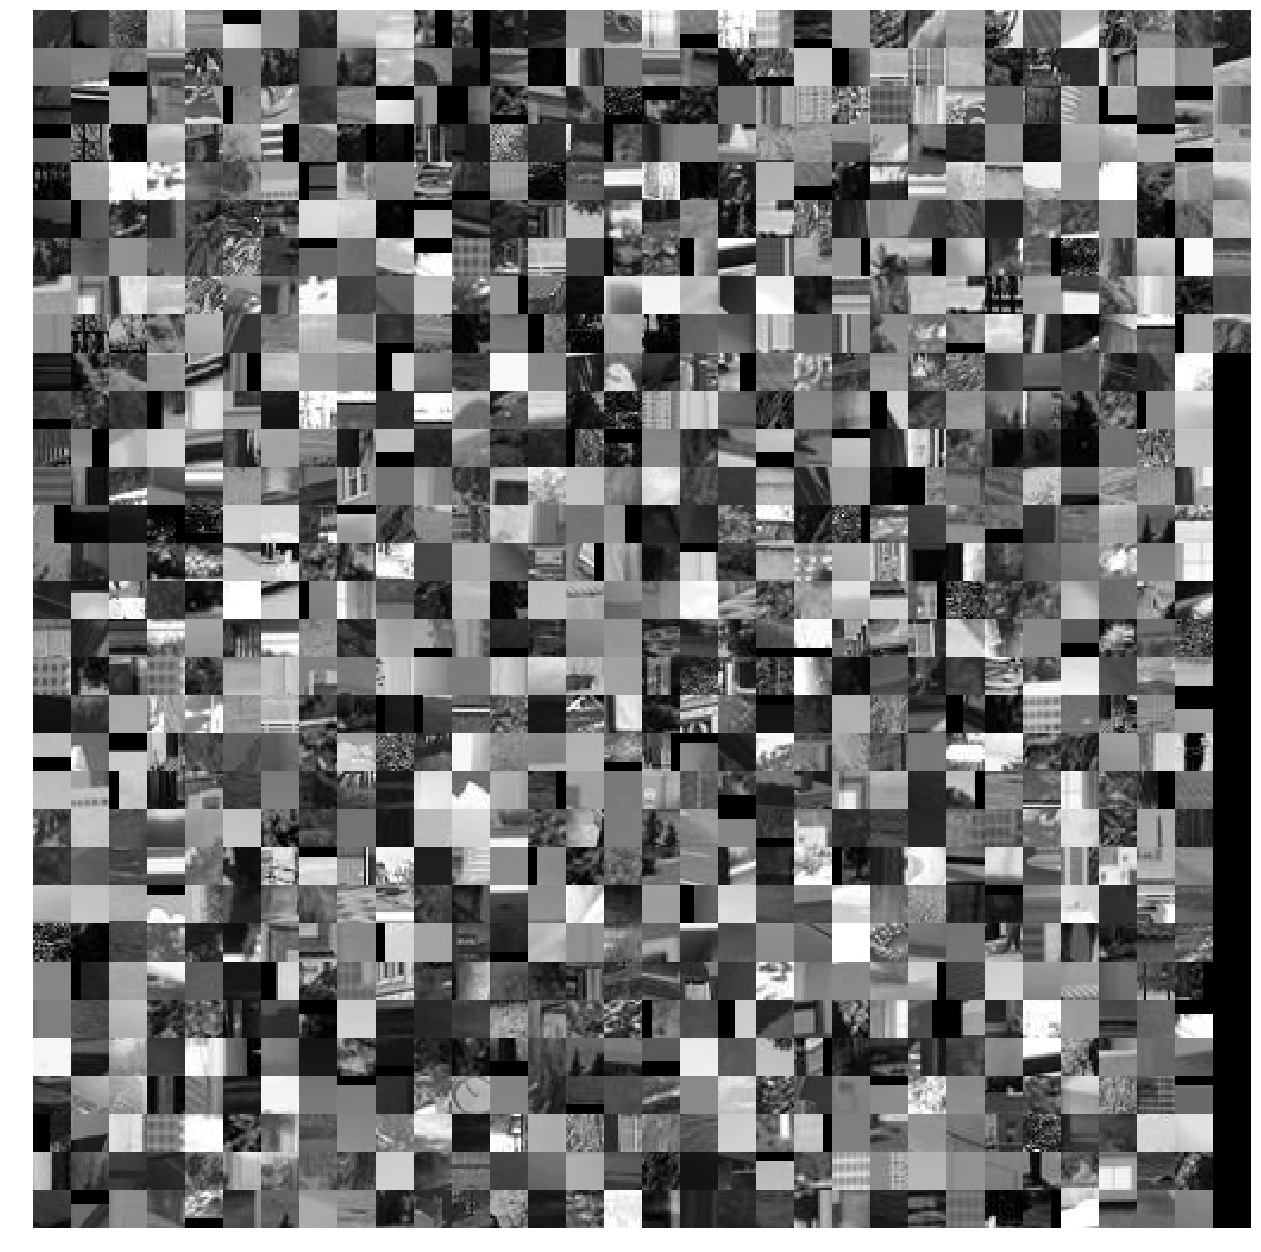

In [121]:
# TODO visually analyze the dict through similar example regions
display_images(regions[np.random.choice(len(regions), 1001)])

In [ ]:
all_regions, all_sifts = get_regions_and_sifts(dir_sc, inames)

(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)
(232, 344)

(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)

(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)

(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)
(264, 264)

(232, 336)
(232, 352)
(232, 392)
(232, 288)
(232, 376)
(232, 280)
(232, 328)
(232, 360)
(232, 312)
(232, 352)
(232, 328)
(232, 360)
(232, 344)
(232, 384)
(232, 296)
(232, 328)
(232, 352)
(232, 344)
(232, 328)
(232, 256)
(232, 360)
(232, 360)
(232, 256)
(232, 352)
(232, 280)
(232, 328)
(232, 352)
(232, 328)
(232, 368)
(232, 320)
(232, 352)
(232, 328)
(232, 336)
(232, 320)
(232, 304)
(232, 344)
(232, 296)
(232, 320)
(232, 304)
(232, 368)
(232, 352)
(232, 352)
(232, 360)
(232, 328)
(232, 368)
(232, 296)
(232, 312)
(232, 328)
(232, 360)
(232, 352)
(232, 328)
(232, 304)
(232, 312)
(232, 312)
(232, 296)
(232, 312)
(232, 360)
(232, 352)
(232, 376)
(232, 264)
(232, 344)
(232, 320)
(232, 304)
(232, 384)
(232, 304)
(232, 288)
(232, 336)
(232, 352)
(232, 320)
(232, 336)
(232, 352)
(232, 352)
(232, 320)
(232, 320)
(232, 312)
(232, 280)
(232, 336)
(232, 352)
(232, 312)
(232, 312)
(232, 320)
(232, 336)
(232, 288)
(232, 360)
(232, 368)
(232, 328)
(232, 352)
(232, 312)
(232, 376)
(232, 264)
(232, 344)

(304, 232)
(232, 304)
(232, 344)
(232, 304)
(232, 304)
(232, 344)
(232, 304)
(232, 304)
(304, 232)
(304, 232)
(232, 304)
(304, 232)
(232, 304)
(232, 400)
(232, 296)
(232, 344)
(232, 304)
(304, 232)
(232, 304)
(232, 312)
(232, 304)
(232, 304)
(232, 296)
(232, 304)
(232, 304)
(232, 336)
(232, 304)
(232, 304)
(304, 232)
(232, 320)
(232, 344)
(232, 344)
(232, 304)
(344, 232)
(232, 304)
(232, 304)
(232, 304)
(232, 304)
(304, 232)
(232, 304)
(232, 304)
(232, 288)
(232, 304)
(304, 232)
(232, 304)
(232, 304)
(232, 336)
(232, 304)
(304, 232)
(304, 232)
(232, 304)
(304, 232)
(304, 232)
(232, 304)
(232, 304)
(232, 304)
(304, 232)
(304, 232)
(232, 304)
(304, 232)
(232, 304)
(232, 304)
(232, 320)
(232, 344)
(232, 344)
(232, 344)
(232, 304)
(232, 304)
(232, 304)
(232, 344)
(232, 304)
(232, 304)
(232, 304)
(232, 344)
(232, 304)
(232, 336)
(232, 344)
(232, 304)
(232, 304)
(304, 232)
(232, 344)
(288, 232)
(232, 304)
(232, 304)
(232, 320)
(232, 304)
(232, 304)
(232, 304)
(320, 232)
(232, 304)
(304, 232)

(248, 232)
(232, 312)
(232, 304)
(232, 344)
(232, 344)
(232, 248)
(232, 344)
(232, 304)
(320, 232)
(232, 344)
(232, 304)
(232, 312)
(320, 232)
(232, 360)
(232, 304)


In [113]:
# Ideally, create `vdregions`, a numpy array of size 1001 x 16 x 16 where each of the 1001 elements is a
# "prototype" patch that is very close to the cluster center

def closer_patches(vidct, regions, sifts):
    vdregions = []
    for centroide in tqdm(vidct):
        save_dist = []
        for region, sift in zip(regions, sifts):
            save_dist.append(np.sqrt(np.sum((sift - centroide)**2)))

        print(np.sort(save_dist))
        vdregions.append(regions[np.argmin(save_dist)])

    return np.array(vdregions)

In [114]:
vdregions = closer_patches(vidct, regions, sifts)

[  160.62235994   161.52109804   163.48519089 ... 27839.28122293
 28132.65621057 28197.55518741]
[  137.01862283   140.42366143   142.35003505 ... 27844.89419917
 28134.08572603 28199.5399433 ]
[  135.96470195   138.96237031   142.83554197 ... 27800.96915823
 28097.86661115 28161.43750748]
[  161.53128732   170.32821095   177.46231043 ... 27883.71043819
 28174.08936414 28239.33457213]
[  138.62377907   139.32281238   142.73518238 ... 27845.95803997
 28133.73975568 28199.55115447]
[  173.43390682   174.55968425   180.2946488  ... 27858.12485709
 28142.27527913 28207.97363653]
[  219.60218293   225.69789513   226.35603477 ... 27811.15449206
 28101.20286936 28166.51871296]
[  169.9164012    176.63175148   176.84199535 ... 27799.84940519
 28085.53199018 28151.08161103]
[  137.83296777   150.36992155   151.66926779 ... 27857.4608138
 28146.85413166 28212.26174443]
[  136.15089073   138.04374612   144.36159812 ... 27883.37013927
 28173.23514983 28238.83729666]
[  166.52836113   169.07925012 

[  142.99745325   156.95640151   157.15881648 ... 27816.31296743
 28114.96757961 28178.35329247]
[  160.32600638   161.53020207   166.27612867 ... 27815.74215104
 28104.27090483 28169.57359734]
[  143.56518406   148.08095942   148.55071099 ... 27847.41308129
 28141.32000885 28206.23667967]
[  159.38567407   160.02047299   161.67891634 ... 27815.8100522
 28104.82070425 28170.06442706]
[  187.18549758   191.9328989    192.60527669 ... 27798.86007987
 28077.72407327 28144.53108226]
[  131.08987547   146.66076448   146.68385186 ... 27873.22198825
 28163.4298276  28228.97500219]
[  115.30926303   115.96838415   116.6312742  ... 27884.21373716
 28174.42024204 28239.8623883 ]
[  163.54963227   166.98134038   168.17958297 ... 27877.61240489
 28166.49094283 28231.95788059]
[  176.24346928   181.03356035   186.78460585 ... 27814.49335838
 28096.84970468 28163.01884418]
[  144.84920567   144.88650682   147.53909897 ... 27864.99359826
 28154.86590483 28220.43418309]
[  134.7248862    135.70504745 

[  190.19113685   194.0219418    202.92162017 ... 27812.39285123
 28108.30218638 28172.54288172]
[  143.36241096   144.56694664   147.48997368 ... 27873.06782578
 28162.9119034  28228.3683828 ]
[  148.20870709   164.98713535   165.6089299  ... 27857.44303722
 28146.73752224 28212.24502954]
[  142.0166374    142.91226809   147.25908216 ... 27847.49165085
 28135.741495   28201.63925213]
[  140.30372769   141.75740971   144.71581728 ... 27859.09368154
 28148.20197069 28213.81381565]
[  135.00922543   139.27358083   139.79164833 ... 27870.87722868
 28161.45993296 28227.01857044]
[  170.551216     181.45339229   182.09524377 ... 27859.86561938
 28145.45669854 28211.07273328]
[  206.6826576    208.017948     209.80541326 ... 27797.62457957
 28077.98244527 28144.27632011]
[  147.55449048   152.94651572   155.62302302 ... 27882.10913102
 28172.58472831 28238.15063025]
[  152.95228095   153.87664808   155.27810635 ... 27867.86251975
 28145.36271762 28212.51657217]
[  163.32814107   169.26461883

[  166.82105183   168.21844787   170.41499734 ... 27809.16946864
 28093.362147   28159.21755044]
[  151.56166649   163.09018608   171.05676819 ... 27883.1651271
 28172.72086304 28238.43497981]
[  156.28806309   156.34724749   157.11284886 ... 27822.69060866
 28120.55386048 28184.63713114]
[  162.97755462   171.45036571   171.78983505 ... 27871.08539001
 28160.68717561 28226.40191674]
[  108.18376759   110.60767405   121.17384474 ... 27833.01092643
 28120.52607135 28185.50974504]
[  171.09218028   173.77378866   175.58388756 ... 27881.20070786
 28171.50252748 28236.93033495]
[  147.96403216   148.67060665   150.71912151 ... 27840.29835993
 28131.58396922 28196.84924069]
[  138.50883344   138.98229806   142.38736335 ... 27862.73349665
 28150.70536576 28216.56795917]
[  140.02401013   142.05261204   143.78145969 ... 27860.75953085
 28149.36634994 28215.00106882]
[  123.92189626   133.37127595   137.6119744  ... 27873.5227742
 28162.88496234 28228.68753626]
[  149.25950774   153.77657891  

[  149.29650526   152.0955232    154.04237843 ... 27868.87212932
 28159.41540908 28224.72705462]
[  136.30239865   154.38747837   163.0274107  ... 27805.25899833
 28095.46617141 28160.81041115]
[  164.43395815   165.42849452   166.64817919 ... 27880.41293851
 28169.31246705 28234.87744013]
[  123.44943894   124.83034681   126.2366966  ... 27843.38732969
 28121.63268487 28188.38386488]
[  141.65202339   153.23713166   153.92157577 ... 27873.21210805
 28163.74868375 28229.31934189]
[  141.50808201   146.88874979   146.99728846 ... 27830.86047295
 28119.1505961  28184.41215089]
[  112.97718055   124.25375015   128.98391482 ... 27874.21364905
 28164.32420635 28229.84225056]
[  134.40960405   139.44426938   140.03562883 ... 27824.34277624
 28112.66238793 28178.42082211]
[  136.09522357   136.4867691    140.27199368 ... 27838.3211778
 28126.07664028 28191.89279786]
[  137.21232627   138.18600897   138.20775262 ... 27856.75670246
 28145.87077855 28211.44443758]
[  161.97819943   163.66870103 

[  164.47973146   167.02040308   169.20720646 ... 27863.80484505
 28151.92641477 28218.09321196]
[  204.91236926   206.68777666   206.70771779 ... 27871.18202039
 28151.14681447 28218.03364655]
[  135.50725173   137.29748709   139.69875082 ... 27838.83236291
 28126.40271643 28192.08472758]
[  134.81923764   138.27543779   142.06025346 ... 27851.2993608
 28144.45987478 28209.40459557]
[  136.25051185   148.7106602    150.05771356 ... 27841.93903062
 28129.33399349 28194.94746072]
[  144.36414516   144.571094     149.31081213 ... 27817.08932858
 28109.81448681 28174.79160688]
[  141.71828816   149.35937583   155.5732123  ... 27827.24087293
 28114.01713684 28179.21331499]
[  145.92078758   146.10961906   151.6761067  ... 27837.21825304
 28123.8122406  28189.80856188]
[  148.76419912   149.18930117   150.02731849 ... 27852.7954228
 28143.10740469 28208.81887853]
[  164.1442781    166.04807111   166.17082498 ... 27844.12185532
 28123.51383779 28190.30737115]
[  141.79339279   149.86884874  

[  150.0123792    151.29303149   153.24864446 ... 27811.12062434
 28096.33320981 28162.31217116]
[  158.89792548   164.33821492   165.84798396 ... 27836.08745218
 28135.17460966 28198.19273451]
[  142.13568566   144.93724959   145.06201735 ... 27865.09655848
 28154.23368403 28219.80060026]
[  133.62671013   148.26811148   150.1579974  ... 27871.07648632
 28161.31614972 28226.79084984]
[  164.93542022   171.74167833   175.42419808 ... 27850.90138303
 28140.38101324 28205.77420077]
[  154.43497376   163.94609235   167.31604561 ... 27810.13056105
 28108.32139874 28171.72607996]
[  148.38964414   148.49902686   152.90200346 ... 27826.77440909
 28113.72828141 28179.61995051]
[  184.42216631   187.24808881   191.52833837 ... 27884.29191821
 28173.85344208 28239.26363364]
[  134.19083233   135.38050878   142.11676297 ... 27869.09882262
 28160.19724304 28225.45342721]
[  160.61768019   161.11340862   164.90807484 ... 27882.60777296
 28172.72927773 28238.11482499]
[  133.22689808   138.78593855

[  135.66433474   140.05662131   141.57912513 ... 27847.21978395
 28138.08534503 28203.57220137]
[  134.84770006   138.45512234   139.85739234 ... 27858.54384574
 28149.02652409 28214.5327966 ]
[  127.84657449   134.90978027   136.59854063 ... 27814.67007788
 28110.87676741 28173.8900772 ]
[  151.77956731   154.81472508   155.86729403 ... 27876.67980438
 28165.59305644 28231.21391883]
[  156.32498293   166.35856784   173.36074572 ... 27858.70837469
 28151.77626437 28216.45400812]
[  154.44714444   154.79792295   155.43366558 ... 27825.61568434
 28117.78139371 28182.58774948]
[  136.72520652   150.06829653   154.57679809 ... 27873.43606494
 28163.94864537 28229.36076825]
[  129.16536322   136.67213323   139.67130113 ... 27851.45584761
 28141.17133201 28206.76599028]
[  156.50241346   166.23264428   166.66907537 ... 27882.3989273
 28172.39181713 28237.81699519]
[  135.83980205   138.07735622   139.07554267 ... 27852.12359348
 28139.92855263 28205.66474544]
[  156.92123772   157.67487362 

[  134.66810855   139.91921901   142.69015575 ... 27846.22209907
 28136.97221915 28202.26291951]
[  143.78463192   144.0153868    145.924305   ... 27835.32269402
 28124.25223117 28189.70949968]
[  161.82182924   175.59244516   177.39823127 ... 27826.02338575
 28115.70132597 28181.15584765]
[  181.66573301   183.40963247   184.90653569 ... 27821.04125823
 28112.99998214 28178.00933454]
[  165.46855088   166.7861799    170.09709569 ... 27823.40311372
 28113.66248637 28179.06538814]
[  126.21699689   138.39614531   143.54589281 ... 27866.44882532
 28155.81244128 28221.51889203]
[  133.76312778   136.54864181   141.31294144 ... 27861.1999249
 28148.46367618 28214.32174903]
[  142.05976085   150.99689815   152.39138488 ... 27868.9290979
 28164.99109645 28229.38682797]
[  105.11544578   106.64197335   107.33498702 ... 27833.13610895
 28121.75138638 28186.73637426]
[  146.68085767   157.74115571   163.4457973  ... 27791.55586395
 28094.85507039 28157.18299411]
[  147.21594708   152.49170771  

[  178.53307036   180.35775574   180.44245707 ... 27788.06874363
 28066.91583159 28133.52912574]
[  147.23000911   148.17021892   149.54967634 ... 27840.81703758
 28134.63446364 28199.3877458 ]
[  129.04545742   132.81183257   135.90590585 ... 27850.40000576
 28143.69717768 28208.45765777]
[  138.98063847   141.17835868   141.56407096 ... 27848.39367993
 28133.99726125 28200.06781669]
[  140.61382906   147.79142272   158.47647612 ... 27878.80667445
 28168.33396121 28233.85663624]
[  129.45258823   142.7473757    145.08258207 ... 27869.04102219
 28158.6415997  28224.04695742]
[  136.87693275   146.44762329   147.49252656 ... 27851.9166823
 28139.31357029 28205.03182738]
[  126.53480654   132.14216668   141.03797242 ... 27867.72727743
 28157.13617507 28222.73063895]
[  148.23756068   150.22538226   152.67857674 ... 27857.49658761
 28149.22677842 28214.0615905 ]
[  104.03985283   112.5923302    112.72558646 ... 27833.47696676
 28121.88481654 28186.81314481]
[  150.85652756   156.81425653 

KeyboardInterrupt: 

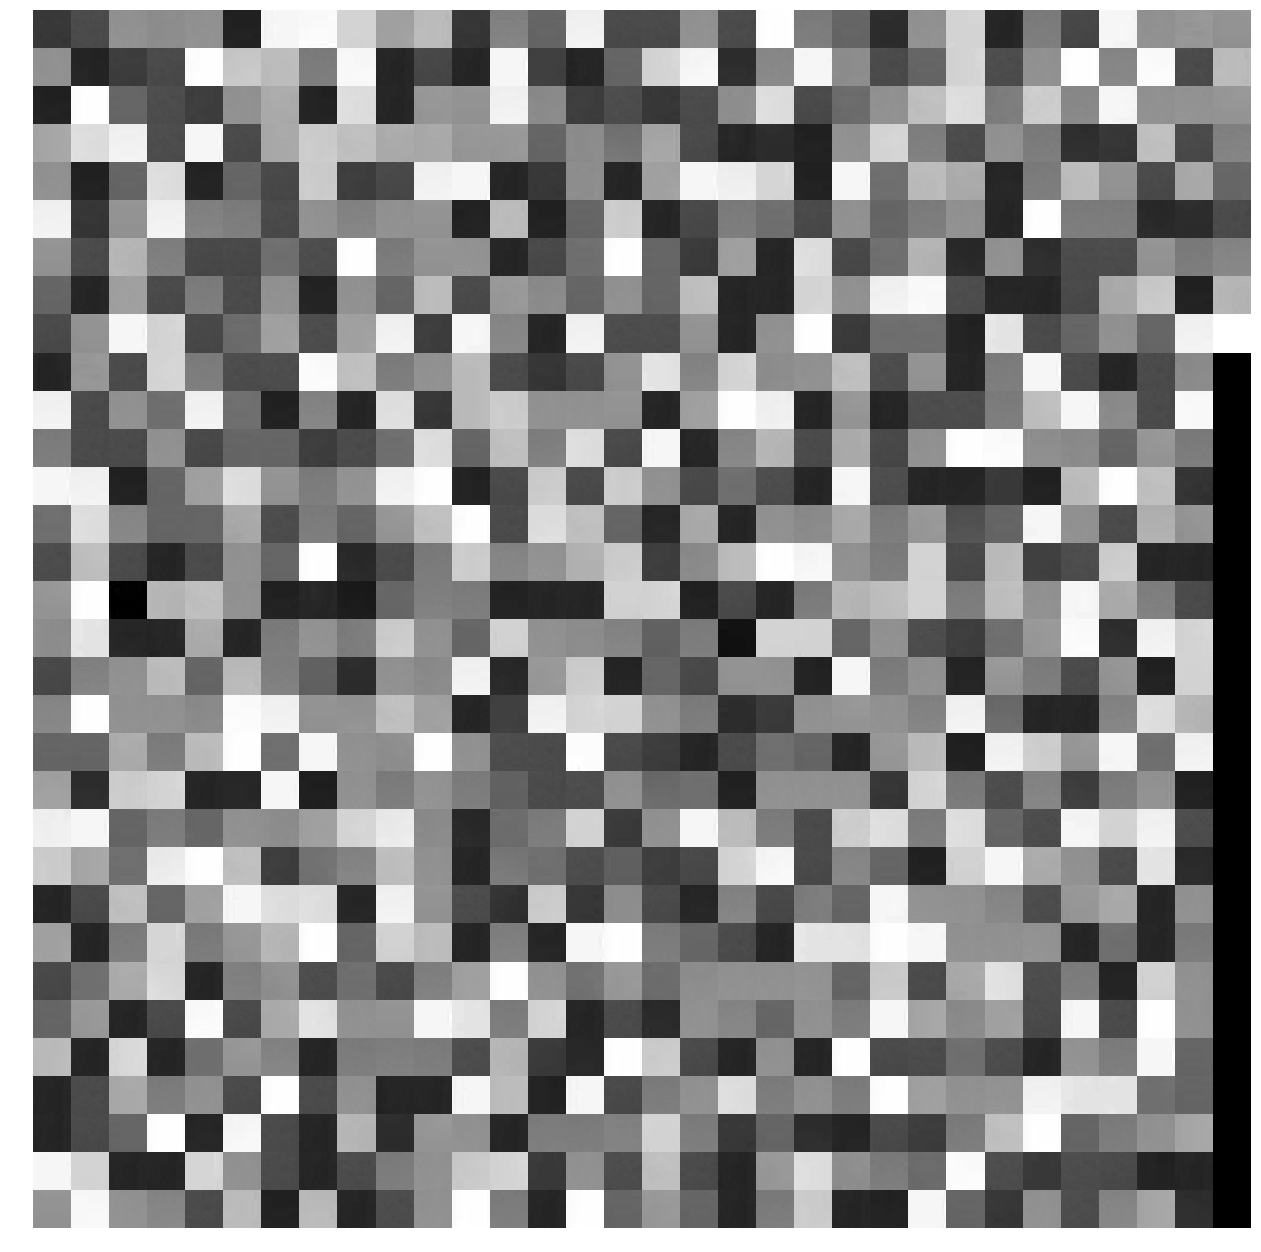

In [112]:
display_images(np.array(vdregions))

# Partie 3 : BoW

In [ ]:
# Compute BoW for an image

def compute_feats(vdict, image_sifts):
    # TODO compute BoW from `image_sifts`
    
    return

In [ ]:
# Visualize your BoW on an image

iname = inames[0]
ipath = os.path.join(dir_sc, iname)
im = read_grayscale(ipath)
sift = compute_sift_image(im)
regions = compute_regions(im)
feats = compute_feats(vdict, sift)

display_vdregions_image(im, vdict, sift, feats, vdregions=None) # if you have vdregions, add it as input here